# Titanic: In all the confusion...

In this notebook we shall take a look at an aspect of classification known as the **confusion matrix**, here applied to the [Titanic data](https://www.kaggle.com/c/titanic). We shall then take a look at the ROC curve, as well as the $F_1$ score.

A confusion matrix is a tool designed to help us understand a little better how well our classifier is performing. An *accuracy score*, like that returned by kaggle for our submission file, lets us know a number indicating what ratio of predictions were correct (0 is not one classification was correct, and 1 is perfect!). The confusion matrix does the same thing, but goes into a little more detail; this time it provides us with four values:
* The number of times our classifier produced **true negatives** (TN)
* The number of times our classifier produced **true positives** (TP)
* The number of times our classifier produced **false positives** (FP), a type I error
* The number of times our classifier produced **false negatives** (FN), a type II error

which scikit-learn returns in the following format, hence the name matrix (note that there is no standard convention for arrangement of this matrix):

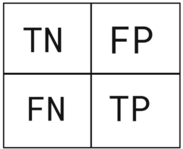


The *accuracy* is given by $\frac{(TN + TP)}{(TN + TP + FP +FN)}$, in other words, the true values divided by all the values. And finally, another measure one may come across is the **$F_1$ score**, which is given by:

$$ F_1 = 2\frac{precision . recall}{precision + recall}$$


where the *precision* is given by $\frac{TP}{TP + FP}$, and *recall* by $\frac{TP}{TP + FN}$.

These Wikipedia pages have excellent descriptions of the meaning of these terms: 
* [Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix)
* [False positives and false negatives](https://en.wikipedia.org/wiki/False_positives_and_false_negatives)
* [Type I and type II errors](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors)
* [Receiver operating characteristic](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)
* [F1 score](https://en.wikipedia.org/wiki/F1_score)



I am now going to produce two confusion matrices for two different Titanic submission files. Rather than run some code here to create a `submission.csv` I am going to make use of a file that we all have access to, and also a file we can easily create:
1. `gender_submission.csv`   this is the file that comes free with the competition
2. `all_0s.csv`              is a submission file in which all the passengers have, sadly, been assigned a 0 (i.e. no survivors)

We shall compare these files containing our results to what is known as the *ground truth*, contained in `submission_solution.csv`. This is the infamous file that contains the answers, and will score a 1.00000 on the LB.

We are going to be using the following routines from the [scikit-learn library](https://scikit-learn.org/stable/):

* [sklearn.metrics.accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html): this routine is analogous to the one used by kaggle to calculate your score on the leaderboard when you submit your file.
* [sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html): this routine will calculate our confusion matrix.
* [sklearn.metrics.f1_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) which returns the $F_1$ score.
* [sklearn.metrics.roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) which computes the Receiver Operating Characteristic (ROC) curve.
* [sklearn.metrics.roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) which computes the Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.

First we shall import the libraries that we will need, and then we shall read in the three csv files as pandas dataframes:

In [ ]:
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# read in the files that I am going to use:
gender   = pd.read_csv('../input/titanic/gender_submission.csv')  
perfect  = pd.read_csv('../input/submission-solution/submission_solution.csv')
allZeros = pd.read_csv('../input/titanic-all-zeros-csv-file/all_0s.csv')


## gender_submission.csv

First let us calculate the accuracy score for the `gender_submission.csv` file:

In [ ]:
accuracy_score( perfect['Survived'] , gender['Survived'] )

This value (here with more decimal places) is what we see on the leaderboard.
Now we shall calculate the confusion matrix (Note the order, which is important: the ground truth file, followed by our estimate file)

In [ ]:
titanic_cm = confusion_matrix( perfect['Survived'] , gender['Survived'] )
print(titanic_cm)

(It is important to note that the convention used by *scikit-learn* is the count of true negatives is $C_{0,0}$, false negatives is $C_{1,0}$, true positives is $C_{1,1}$ and false positives is $C_{0,1}$).

We can make this look nicer, with some colours, using a [seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html):

In [ ]:
# convert the ndarray to a pandas dataframe
cm_df = pd.DataFrame(titanic_cm)
# set the size of the figure
plt.figure(figsize = (5,5))
sn.heatmap(cm_df, 
           annot=True, annot_kws={"size": 25},
           fmt="d",         # decimals format
           xticklabels=False, 
           yticklabels=False,
           cmap="viridis", 
           cbar=False)
plt.show()

or make a [*mosaic plot*](https://www.statsmodels.org/stable/generated/statsmodels.graphics.mosaicplot.mosaic.html)  with proportional areas (note the different arrangement)

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
data = {('False', 'Negative'): cm_df.iloc[1,0],  ('True', 'Negative'): cm_df.iloc[0,0], ('True', 'Positive'): cm_df.iloc[1,1], ('False', 'Positive'): cm_df.iloc[0,1]}
mosaic(data, gap = 0.02)
plt.show();

or perhaps more intuitively, as a [bar plot]( https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)

In [ ]:
cm_df_2 = cm_df.copy()
# swap elements
cm_df_2.iloc[0,1] = cm_df.iloc[1,1]
cm_df_2.iloc[1,1] = cm_df.iloc[0,1]
# add names
cm_df_2.columns =["Negative", "Positive"]
cm_df_2.index   =["True",     "False"]
# plot
cm_df_2.plot.bar(stacked=True, color=["olive", "mediumslateblue"], figsize=(5,5));

We can calculate even more things with these values:

In [ ]:
tn, fp, fn, tp = confusion_matrix(perfect['Survived'] , gender['Survived']).ravel()
print("Number of true negatives  (tn) = ",tn)
print("Number of true positives  (tp) = ",tp)
print("Number of false negatives (fn) = ",fn)
print("Number of false positives (fp) = ",fp)
print("Precision                                          = tp / (tp + fp) =", tp / (tp + fp))
print("Recall or 'sensitivity' (aka. true positive rate)  = tp / (tp + fn) =", tp / (tp + fn))
print("Specificity             (aka. true negative rate)  = tn / (tn + fp) =", tn / (tn + fp))
print("Fall out                (aka. false positive rate) = fp / (fp + tn) =", fp / (fp + tn))
print("Miss rate               (aka. false negative rate) = fn / (fn + tp) =", fn / (fn + tp))

In the Titanic competition the submission file contains 418 values that we have to classify. From our above score we can see that `0.7655502392344498 x 418 = 320` In other words, the `gender_submission.csv` file correctly identifies 320 of the values. What the confusion matrix tells us now, in more detail, is that we got 214 of the people who did not survive right, and 106 of the people who did survive right. But also that we killed 52 of the passengers in our model, and brought 46 of them back to life!
## ROC curve
In the above calculations we have also obtained the *true positive rate* (TPR, also known as the *recall*) and the *false positive rate* (FPR, or the *fall out*). If we plot the true positive rate with respect to the false positive rate we obtain what is known as the [receiver operating characteristic curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) (or **ROC curve**). It is often deemed interesting to also calculate the *area under the curve* (**AUC**). An AUC score of 1 means a perfect classification, whereas a score of 0.5 means that your classifier is as about as useful as randomly flipping a coin. In this example, with only one point on the ROC curve, it is easy to calculate the AUC score using the [trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule):

$$AUC = FPR\frac{TPR}{2} + (1-FPR)\frac{TPR +1}{2}$$

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve( perfect['Survived'] , gender['Survived'] )

from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score( perfect['Survived'] , gender['Survived'] )
print("AUC = ", roc_auc)

plt.figure(figsize = (8,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.show()

Finally we shall calculate the $F_1$ score

In [ ]:
f1_score( perfect['Survived'] , gender['Survived'] )

when we are choosing the classifier that best models for our problem, it is usual to choose the one that gives the highest $F_1$ score.

## No survivors

As an exercise we shall repeat the above procedure, this time for the file containing all zeros, indicating no survivors:

In [ ]:

accuracy_score( perfect['Survived'] , allZeros['Survived'] )


This is our accuracy score. Now for the confusion matrix for the case of 'all zeros':

In [ ]:
titanic_cm = confusion_matrix( perfect['Survived'] , allZeros['Survived'] )
print(titanic_cm)

In [ ]:
# convert the ndarray to a pandas dataframe
cm_df = pd.DataFrame(titanic_cm)
# set the size of the figure
plt.figure(figsize = (5,5))
sn.heatmap(cm_df, 
           annot=True, annot_kws={"size": 25},
           fmt="d",         # decimals format
           xticklabels=False, 
           yticklabels=False,
           cmap="viridis", 
           cbar=False)
plt.show()

In [ ]:
tn, fp, fn, tp = confusion_matrix( perfect['Survived'] , allZeros['Survived']).ravel()
print("Number of true negatives  (tn) = ",tn)
print("Number of true positives  (tp) = ",tp)
print("Number of false negatives (fn) = ",fn)
print("Number of false positives (fp) = ",fp)
print("Precision                                          = tp / (tp + fp) =", tp / (tp + fp))
print("Recall or 'sensitivity' (aka. true positive rate)  = tp / (tp + fn) =", tp / (tp + fn))
print("Specificity             (aka. true negative rate)  = tn / (tn + fp) =", tn / (tn + fp))
print("Fall out                (aka. false positive rate) = fp / (fp + tn) =", fp / (fp + tn))
print("Miss rate               (aka. false negative rate) = fn / (fn + tp) =", fn / (fn + tp))

This time we can see that now we have no false positives (whereas before we had 46) so we have correctly identified all of the 260 people who died (true negatives). But this is no great surprise given that we 'killed' everyone in the file! And all the rest fall into the quadrant of false negatives. We can see that the $TP + FP = 0$, so the *precision* is undefined (python returns a ***nan***), in this situation the $F_1$ would return a $0$.

### Related reading
* [False positives, false negatives and the discrimination threshold](https://www.kaggle.com/carlmcbrideellis/discrimination-threshold-false-positive-negative)